In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import seaborn as sns
import numpy as np
from scipy.stats import linregress

            date  Tmean  Tmax
0     1951-01-01    0.7   2.0
1     1951-01-02    1.0   2.0
2     1951-01-03    0.4   1.0
3     1951-01-04    0.4   1.5
4     1951-01-05    4.2   6.0
...          ...    ...   ...
27024 2024-12-27    0.5   4.5
27025 2024-12-28   -1.4   4.7
27026 2024-12-29   -2.0  -0.9
27027 2024-12-30   -1.9  -1.6
27028 2024-12-31   -2.3  -1.4

[27029 rows x 3 columns]


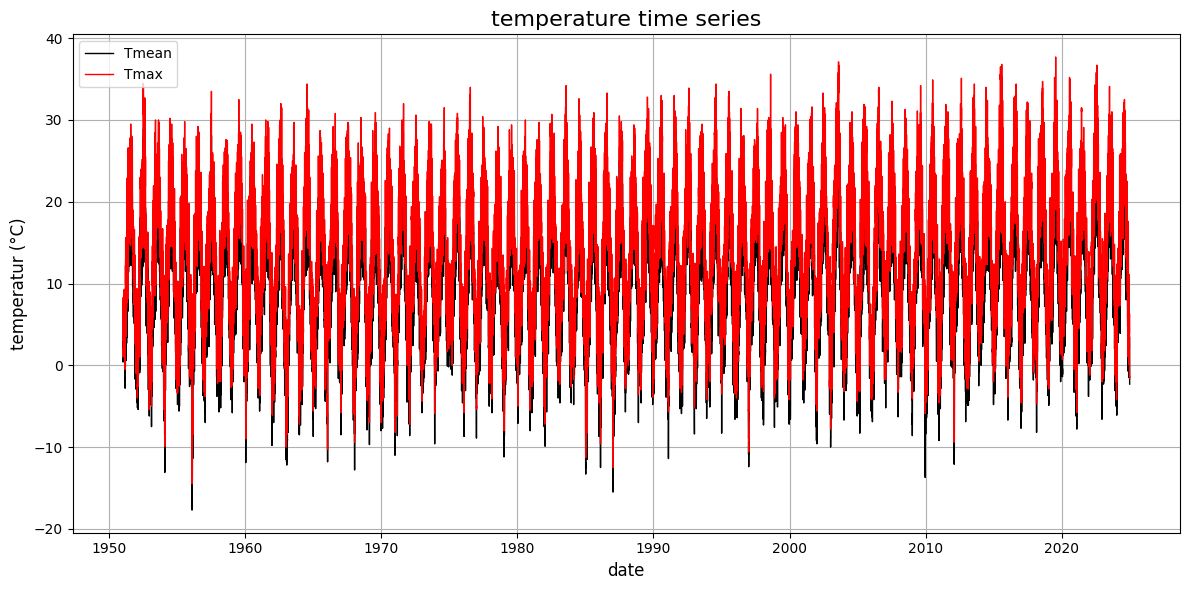

In [2]:
# read pre-processed data and visualize; Tmean = daily mean Temperature; Tmax = daily maximum Temperature
pfad='DATA\\DWD\\'
df = pd.read_csv(''+str(pfad)+'tmax_19510101_20241231_04336-Saarbruecken_prepr.csv', parse_dates=['date'])
print(df)
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Tmean'], label='Tmean', color='black', linewidth=1)
plt.plot(df['date'], df['Tmax'], label='Tmax', color='red', linewidth=1)
plt.title('temperature time series', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('temperatur (°C)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
# calculate some percentiles
df['year'] = df['date'].dt.year

yvalues = df.groupby('year').agg(
    Tmean_avg=('Tmean', 'mean'),
    Tmax_max=('Tmax', 'max')
).reset_index()

perc95 = df.groupby('year')['Tmax'].quantile(0.95).reset_index(name='Tmax_95')
perc98 = df.groupby('year')['Tmax'].quantile(0.98).reset_index(name='Tmax_98')
df_perc95 = df[['year', 'Tmax']].merge(perc95, on='year', how='left')
df_gt95 = df_perc95[df_perc95['Tmax'] > df_perc95['Tmax_95']]
mean_gt95 = df_gt95.groupby('year')['Tmax'].mean().reset_index(name='Tmax_gt95')
df_perc98 = df[['year', 'Tmax']].merge(perc98, on='year', how='left')
df_gt98 = df_perc98[df_perc98['Tmax'] > df_perc98['Tmax_98']]
mean_gt98 = df_gt98.groupby('year')['Tmax'].mean().reset_index(name='Tmax_gt98')

# TRENDS
Tmax at station 04336 shows an accelerated trend after 1990  

In [4]:
period1 = yvalues[(yvalues['year'] >= 1951) & (yvalues['year'] <= 1990)]
period2 = yvalues[(yvalues['year'] >= 1991) & (yvalues['year'] <= 2024)]

def calc_trend(tdata, x_key, y_key):
    x = tdata[x_key]
    y = tdata[y_key]
    # Lineare Regression
    slope, interc, _, _, _ = linregress(x, y)
    # Trendlinie berechnen
    trend = slope * x + interc
    return x, trend, slope

x1_tmean, trend1_tmean, slope1_tmean = calc_trend(period1, 'year', 'Tmean_avg')
x2_tmean, trend2_tmean, slope2_tmean = calc_trend(period2, 'year', 'Tmean_avg')

x1_tmax, trend1_tmax, slope1_tmax = calc_trend(period1, 'year', 'Tmax_max')
x2_tmax, trend2_tmax, slope2_tmax = calc_trend(period2, 'year', 'Tmax_max')
print('Trend annual mean of Tmean before and after 1990 (°C per decade):',(slope1_tmean*10).round(3),(slope2_tmean*10).round(3))
print('Trend annual maximum of Tmax before and after 1991 (°C per decade):',(slope1_tmax*10).round(3),(slope2_tmax*10).round(3))

Trend annual mean of Tmean before and after 1990 (°C per decade): 0.058 0.506
Trend annual maximum of Tmax before and after 1991 (°C per decade): 0.273 0.787


# Tmean versus Tmax
The figures below reveals that the trend in extreme temperatures is stronger than the trend in mean temperatures 

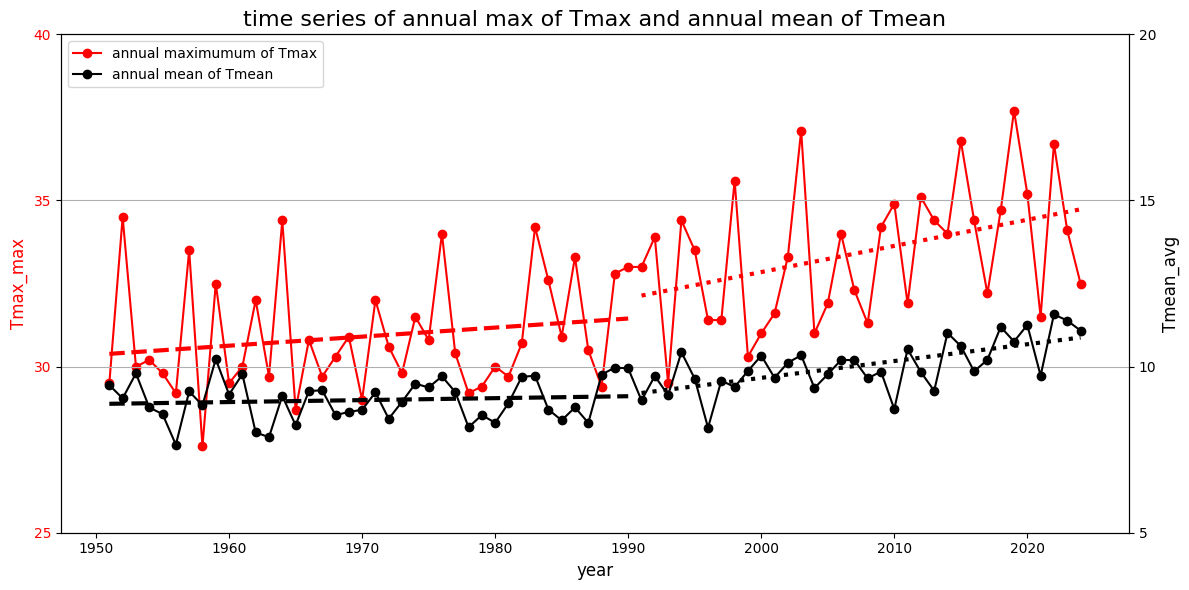

In [5]:
plt.figure(figsize=(12, 6))

line1,=plt.plot(yvalues['year'], yvalues['Tmax_max'], label='annual maximumum of Tmax', color='red', marker='o')
plt.xlabel('year', fontsize=12)
plt.ylabel('Tmax_max', fontsize=12, color='red')
plt.tick_params(axis='y', labelcolor='red')
plt.ylim(25, 40)
plt.yticks(range(25, 41, 5))
plt.plot(x1_tmax, trend1_tmax, color='red', linestyle='--', linewidth=3)
plt.plot(x2_tmax, trend2_tmax, color='red', linestyle=':', linewidth=3)
ax2 = plt.gca().twinx()
line2,=ax2.plot(yvalues['year'], yvalues['Tmean_avg'], label='annual mean of Tmean', color='black', marker='o')
ax2.set_ylabel('Tmean_avg', fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(5, 20)
ax2.set_yticks(range(5, 21, 5))
ax2.plot(x1_tmean, trend1_tmean, color='black', linestyle='--', linewidth=3)
ax2.plot(x2_tmean, trend2_tmean, color='black', linestyle=':', linewidth=3)
plt.title('time series of annual max of Tmax and annual mean of Tmean', fontsize=16)
plt.legend(handles=[line1, line2], loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## And the same for the 2% warmest days (perc98)

Trend of 2% warmest days per year before and after 1990 (°C per decade): 0.16 0.866


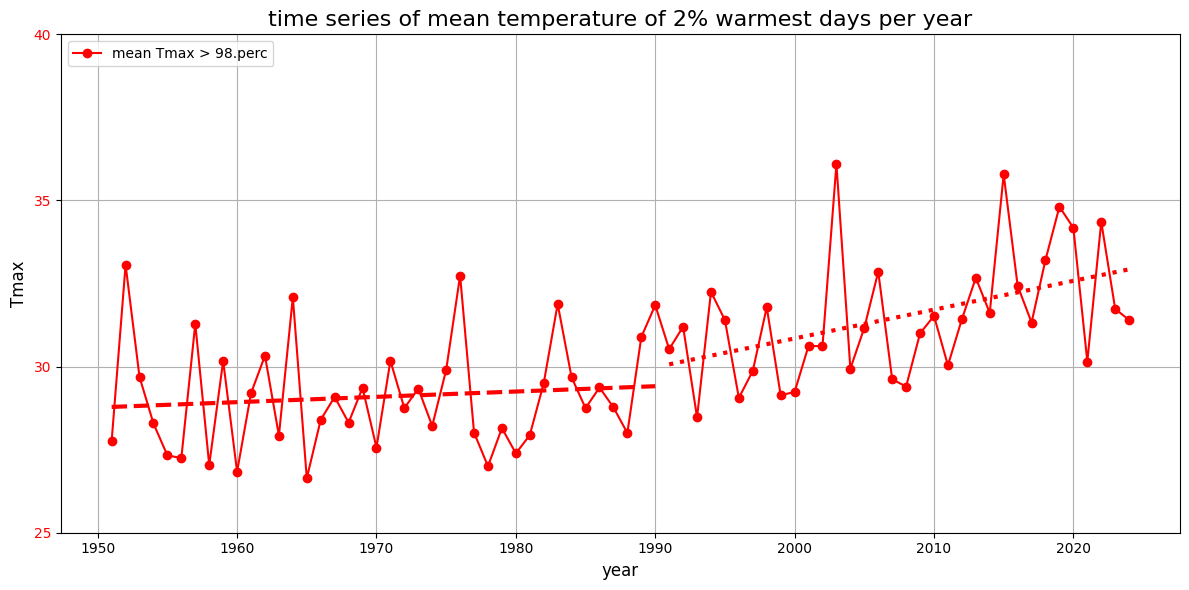

In [6]:
period1 = mean_gt98[(mean_gt98['year'] >= 1951) & (mean_gt98['year'] <= 1990)]
period2 = mean_gt98[(mean_gt98['year'] >= 1991) & (mean_gt98['year'] <= 2024)]

x1_t98, trend1_t98, slope1_t98 = calc_trend(period1, 'year', 'Tmax_gt98')
x2_t98, trend2_t98, slope2_t98 = calc_trend(period2, 'year', 'Tmax_gt98')

print('Trend of 2% warmest days per year before and after 1990 (°C per decade):',(slope1_t98*10).round(3),(slope2_t98*10).round(3))

plt.figure(figsize=(12, 6))
plt.plot(mean_gt98['year'], mean_gt98['Tmax_gt98'], label='mean Tmax > 98.perc', color='red', marker='o')
plt.xlabel('year', fontsize=12)
plt.ylabel('Tmax', fontsize=12)
plt.tick_params(axis='y', labelcolor='red')
plt.ylim(25, 40)
plt.yticks(range(25, 41, 5))
plt.plot(x1_t98, trend1_t98, color='red', linestyle='--', linewidth=3)
plt.plot(x2_t98, trend2_t98, color='red', linestyle=':', linewidth=3)
plt.title('time series of mean temperature of 2% warmest days per year', fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# HOT DAYS (Tmax > 30°C)
The Figure below reveals, that the increase of hot days is particularly strong in July, August, and September

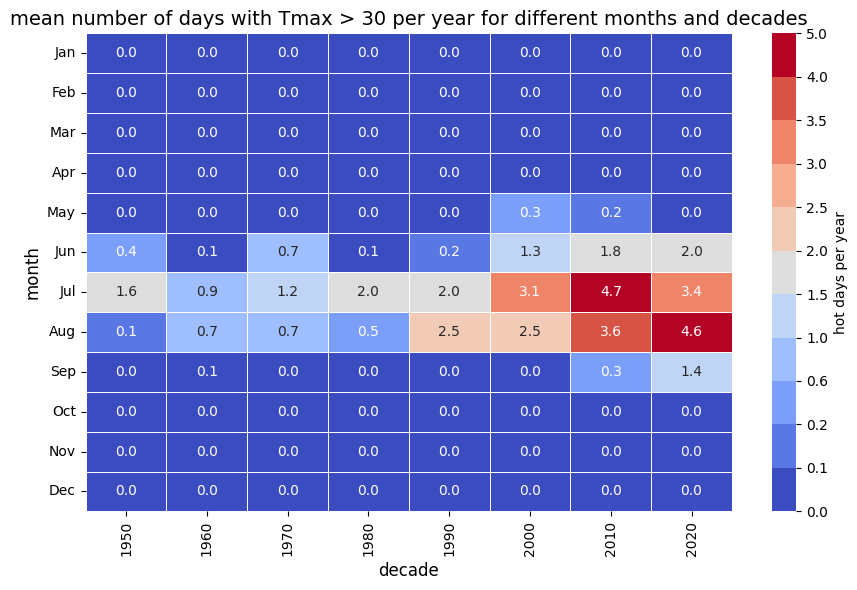

In [7]:
import warnings
warnings.filterwarnings('ignore')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['decade'] = (df['year'] // 10) * 10
df_30 = df[df['Tmax'] > 30]
hdata = df_30.groupby(['decade', 'month']).size().unstack(fill_value=0)
hdata = hdata.reindex(columns=range(1, 13), fill_value=0)
ypd = df['decade'].value_counts().sort_index()
for decade in hdata.index:
    yid = ypd.get(decade, 0)/365
    if yid > 0:
        hdata.loc[decade] /= yid
hdata = hdata.T

bounds = [0.0, 0.1, 0.2, 0.6, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0]

coolwarm = plt.cm.get_cmap('coolwarm', len(bounds) - 1)
cmap = ListedColormap(coolwarm(np.linspace(0, 1, len(bounds) - 1)))
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(9, 6))

sns.heatmap(
    hdata,
    cmap=cmap,
    norm=norm,
    annot=True,
    fmt='.1f',
    linewidths=0.5,
    cbar_kws={'label': 'hot days per year', 'ticks': bounds},
    xticklabels=False,
    yticklabels=False
)

ax = plt.gca()
ax.set_xticks(np.arange(hdata.shape[1]) + 0.5)
ax.set_xticklabels(hdata.columns, rotation=90, ha='center')
ax.set_yticks(np.arange(hdata.shape[0]) + 0.5)
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0, va='center')

plt.title('mean number of days with Tmax > 30 per year for different months and decades', fontsize=14)
plt.xlabel('decade', fontsize=12)
plt.ylabel('month', fontsize=12)

plt.tight_layout()
plt.show()

# HEAT WAVES
The increase in hot days has an impact on the occurrence of heatwaves, which pose a particular health risk, especially for vulnerable population groups. Here, we use the following definition for heatwaves: at least 3 consecutive hot days, where a single day with at least 27°C, which lies between two hot days, does not interrupt the heatwave.

In [8]:
# compuation of heat waves
hperiod = df[(df['month'] >= 5) & (df['month'] <= 9)][['date', 'Tmax']]
thrs = 30
thrs2 = 27
minl=3
hperiod['heatw']=0
hperiod['hday'] = (hperiod['Tmax'] >= thrs).astype(int)
T_cond = hperiod['Tmax'] > thrs2

prev_hday = hperiod['hday'].shift(1).fillna(0).astype(int)
next_hday = hperiod['hday'].shift(-1).fillna(0).astype(int)

hperiod['hday'] = hperiod['hday'] | ((prev_hday & next_hday & T_cond).astype(int))

i = 0
while i < len(hperiod):
    if hperiod.iloc[i]['hday'] == 1:
        z = 1
        j = i + 1
        while j < len(hperiod) and hperiod.iloc[j]['hday'] == 1:
            z += 1
            j += 1
        if z >= minl:
            hperiod.iloc[i:j, hperiod.columns.get_loc('heatw')] = 1
            i = j
        else:
            i += 1
    else:
        i += 1

# VISUALIZATION OF OCCURRENCE OF HEAT WAVES
In the figure below, each red vertical pixel row represents a heatwave. The visualization shows that in the 21st century, heatwaves have become more frequent and are occurring both earlier and later in the year.

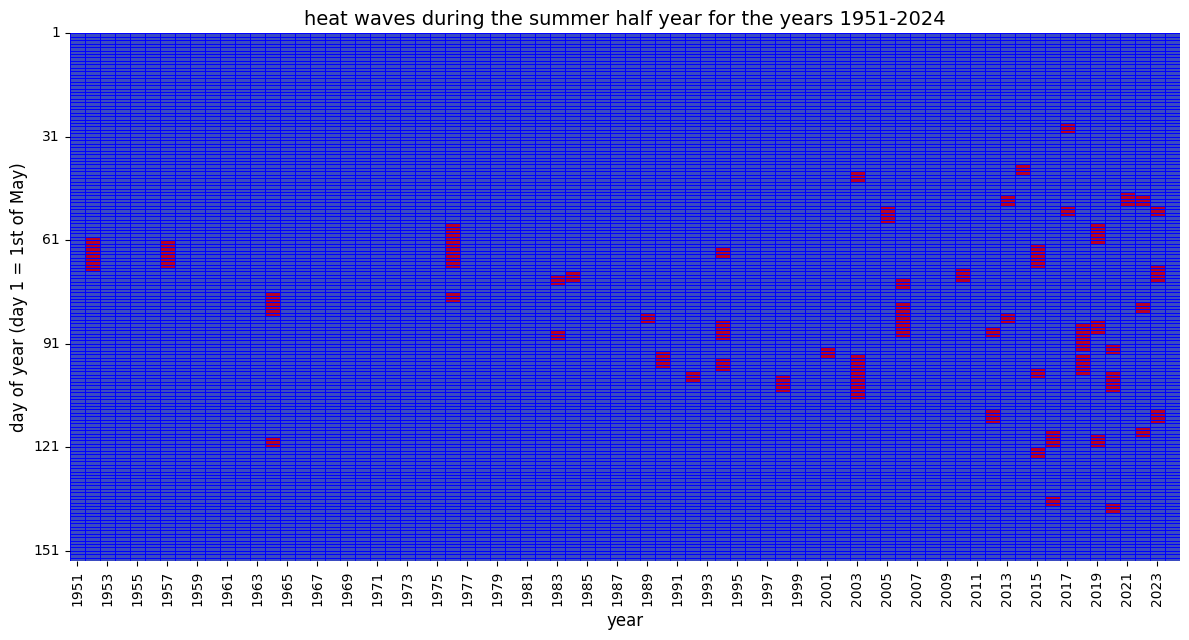

In [9]:
# visualize heat waves
hperiod_f=hperiod.copy()
hperiod_f['year'] = hperiod_f['date'].dt.year
hperiod_f['doy'] = hperiod_f['date'].dt.dayofyear - hperiod_f['year'].apply(lambda x: pd.Timestamp(year=x, month=4, day=30).dayofyear)
heatmap_data = hperiod_f.pivot_table(index='doy', columns='year', values='heatw', aggfunc=np.max)

plt.figure(figsize=(12, 6.5))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt='.0f', linewidths=0.5,linecolor='blue', cbar=False)

plt.title('heat waves during the summer half year for the years 1951-2024', fontsize=14)
plt.xlabel('year', fontsize=12)
plt.ylabel('day of year (day 1 = 1st of May)', fontsize=12)

plt.yticks(ticks=np.arange(0, 153, 30), labels=np.arange(1, 154, 30), rotation=0)
plt.tight_layout()
plt.show()

# And finally some numbers ...
Here, we compare some significant numbers for the 21st century with numbers for the end of the 20th century

In [10]:
# select period for end of 20th century and for 21st century
hperiod['year'] = hperiod['date'].dt.year
hperiod1=hperiod[(hperiod['year'] >= 1977) & (hperiod['year'] <= 2000)][['date', 'Tmax','heatw']]
hperiod2=hperiod[(hperiod['year'] >= 2001) & (hperiod['year'] <= 2024)][['date', 'Tmax','heatw']]
hperiod1['hday'] = (hperiod1['Tmax'] >= thrs).astype(int)
hperiod2['hday'] = (hperiod2['Tmax'] >= thrs).astype(int)

# compute numbers for end of 20th century
le=[]
st=[]
num=0
i=0
while i < len(hperiod1):
    tst=0.
    if hperiod1.iloc[i]['heatw'] == 1:
        num=num+1
        z = 1
        j = i + 1
        tst=tst+hperiod1.iloc[i]['Tmax']
        while j < len(hperiod1) and hperiod1.iloc[j]['heatw'] == 1:
            tst=tst+hperiod1.iloc[j]['Tmax']
            z += 1
            j += 1

        le.append(int(z))
        st.append(tst/float(z))
        
        i = j
    else:
        i += 1

num1=num
st1=np.mean(st)
stmax1=np.max(st)
le1=np.mean(le)
lmax1=np.max(le)
hsum1 = hperiod1['hday'].sum()
hfrac1=((num1*le1)/hsum1)*100.

In [11]:
# compute numbers for the 21st century
le=[]
st=[]
num=0
i=0
while i < len(hperiod2):
    tst=0.
    if hperiod2.iloc[i]['heatw'] == 1:
        num=num+1
        z = 1
        j = i + 1
        tst=tst+hperiod2.iloc[i]['Tmax']
        while j < len(hperiod2) and hperiod2.iloc[j]['heatw'] == 1:
            tst=tst+hperiod2.iloc[j]['Tmax']
            z += 1
            j += 1

        le.append(int(z))
        st.append(tst/float(z))
        
        i = j
    else:
        i += 1

num2=num
st2=np.mean(st)
stmax2=np.max(st)
le2=np.mean(le)
lmax2=np.max(le)
hsum2 = hperiod2['hday'].sum()
hfrac2=((num2*le2)/hsum2)*100.

In [12]:
# display numbers
tabdata = {
    "1977-2000": [num1, le1, lmax1, st1, stmax1, hsum1, hfrac1],
    "2001-2024": [num2, le2, lmax2, st2, stmax2, hsum2, hfrac2],
}

dfd = pd.DataFrame(tabdata, index=["number of heatwaves", "mean heatwave length (days)", "maximum heatwave length (days)", \
                                  "mean heat wave strength (°C)", "maximum heat wave strength (°C)", \
                                  "number of hot days", "fraction of hot days in heat waves (%)"])
dfd = dfd.round(1)
display(dfd)

,1977-2000,2001-2024
number of heatwaves,10.0,34.0
mean heatwave length (days),3.8,4.4
maximum heatwave length (days),6.0,13.0
mean heat wave strength (°C),31.7,32.0
maximum heat wave strength (°C),32.8,35.7
number of hot days,83.0,242.0
fraction of hot days in heat waves (%),45.8,61.6


# Interpretation of numbers:
The number of heatwaves has significantly increased in the 21st century, whereas the mean heatwave length and intensity have only slightly risen. We observe a clear increase in the number of hot days in the 21st century, with the majority of them (61.6%) occurring as part of heatwaves